# Project 2(AI+ML) 

## #1. Import Libraries

In [211]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm , probplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


### Loading of datasets

In [154]:
dr= pd.read_csv(r'C:\Users\Fast Computers\Downloads\googleplaystore_user_reviews.csv\googleplaystore_user_reviews.csv')

In [153]:
dg=pd.read_csv(r'C:\Users\Fast Computers\Downloads\googleplaystore.csv')

## EDA

In [155]:
dr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [156]:
dg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [157]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [158]:
dr.shape

(64295, 5)

In [159]:
dg.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [160]:
dr.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [161]:
dg.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [162]:
dr.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Basic Statistics

In [163]:
dg.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [164]:
dr.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [165]:
# Handle missing values
dg = dg.dropna()

# Convert 'Reviews' column to numeric
dg['Reviews'] = pd.to_numeric(dg['Reviews'], errors='coerce')


### OUtliers detection and removal

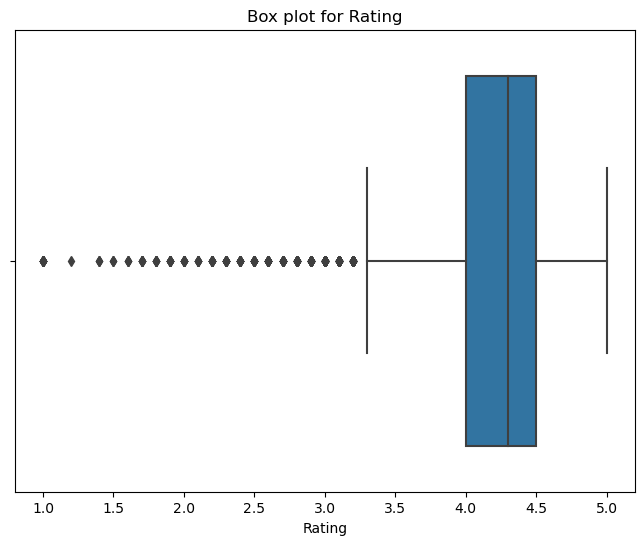

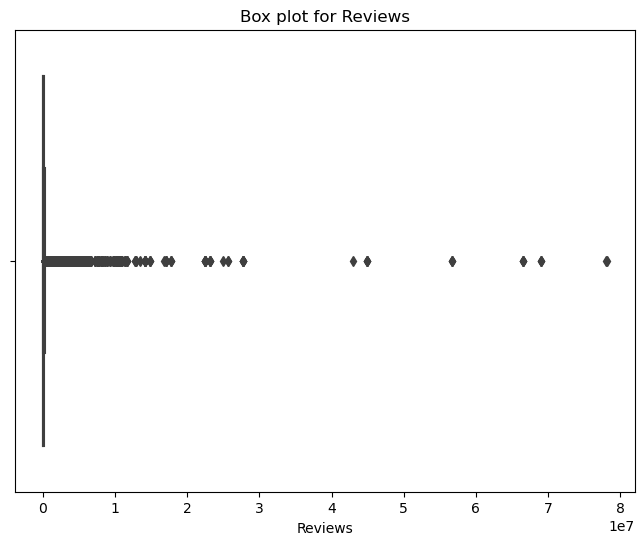

In [166]:
# Create box plots for numerical columns with potential outliers
numerical_columns = ['Rating', 'Reviews']  # Include other numerical columns as needed

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=dg)
    plt.title(f'Box plot for {column}')
    plt.show()


In [167]:
from scipy.stats import zscore

# Calculate Z-Score for numerical columns
z_scores = zscore(dg[['Rating', 'Reviews']])  # Include other numerical columns as needed

# Define a threshold for Z-Score (e.g., 3)
threshold = 3

# Identify outliers
outliers = (np.abs(z_scores) > threshold).all(axis=1)

# Print rows with outliers
print(dg[outliers])


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


### Distribution of Ratings

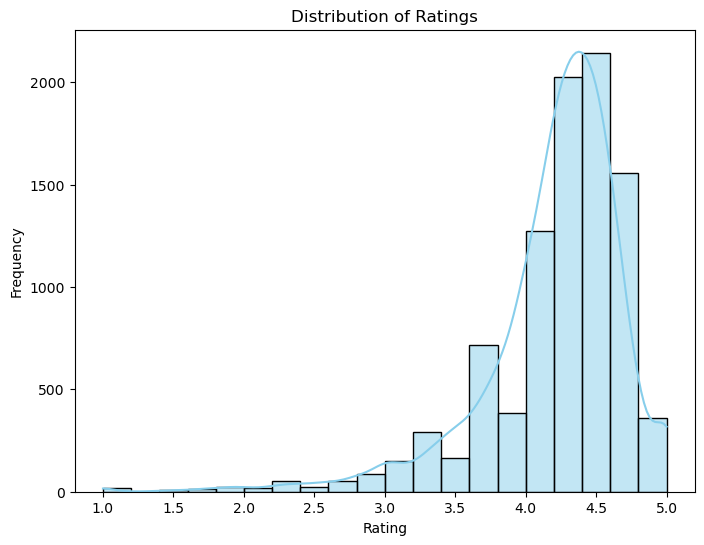

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(dg['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Distribution of Reviews

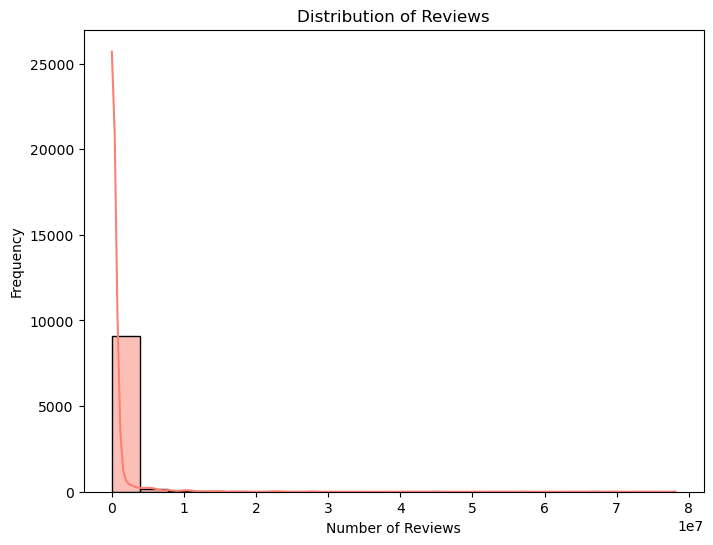

In [169]:
# Histogram of Reviews
plt.figure(figsize=(8, 6))
sns.histplot(dg['Reviews'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


## Scatter plot of Rating vs Category

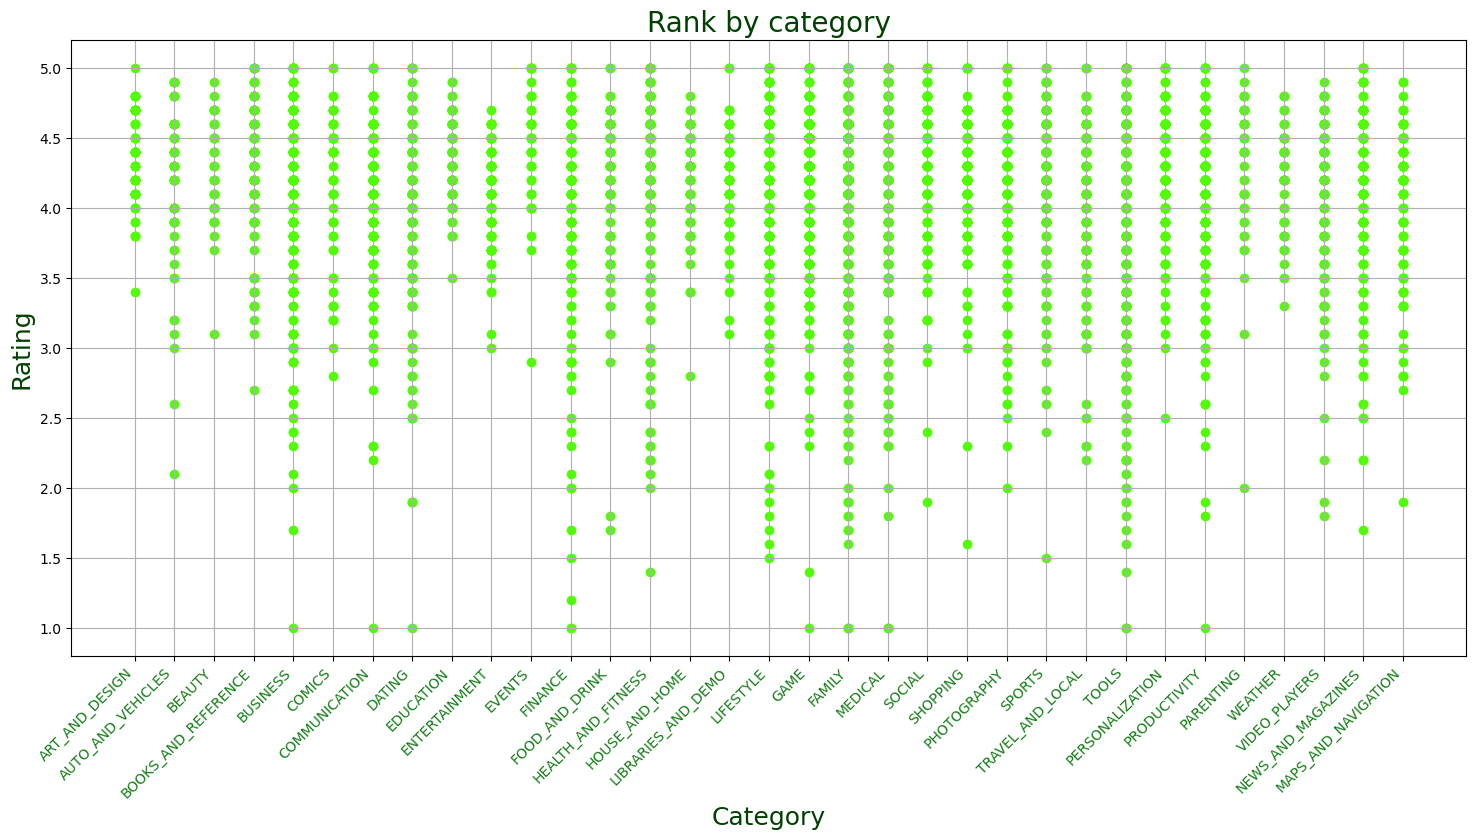

In [170]:
plt.figure(figsize=(18, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
plt.scatter(dg['Category'] , dg['Rating'] , color = color)
plt.xlabel('Category', color=color_t, fontsize=18)
plt.ylabel('Rating' , color=color_t, fontsize=18)
plt.xticks(rotation=45, ha='right' , color=text_color)
plt.title('Rank by category', size=20 , color=color_t)
plt.grid()
plt.show()

## Grid plot of installs vs category

<Axes: xlabel='Category', ylabel='Installs'>

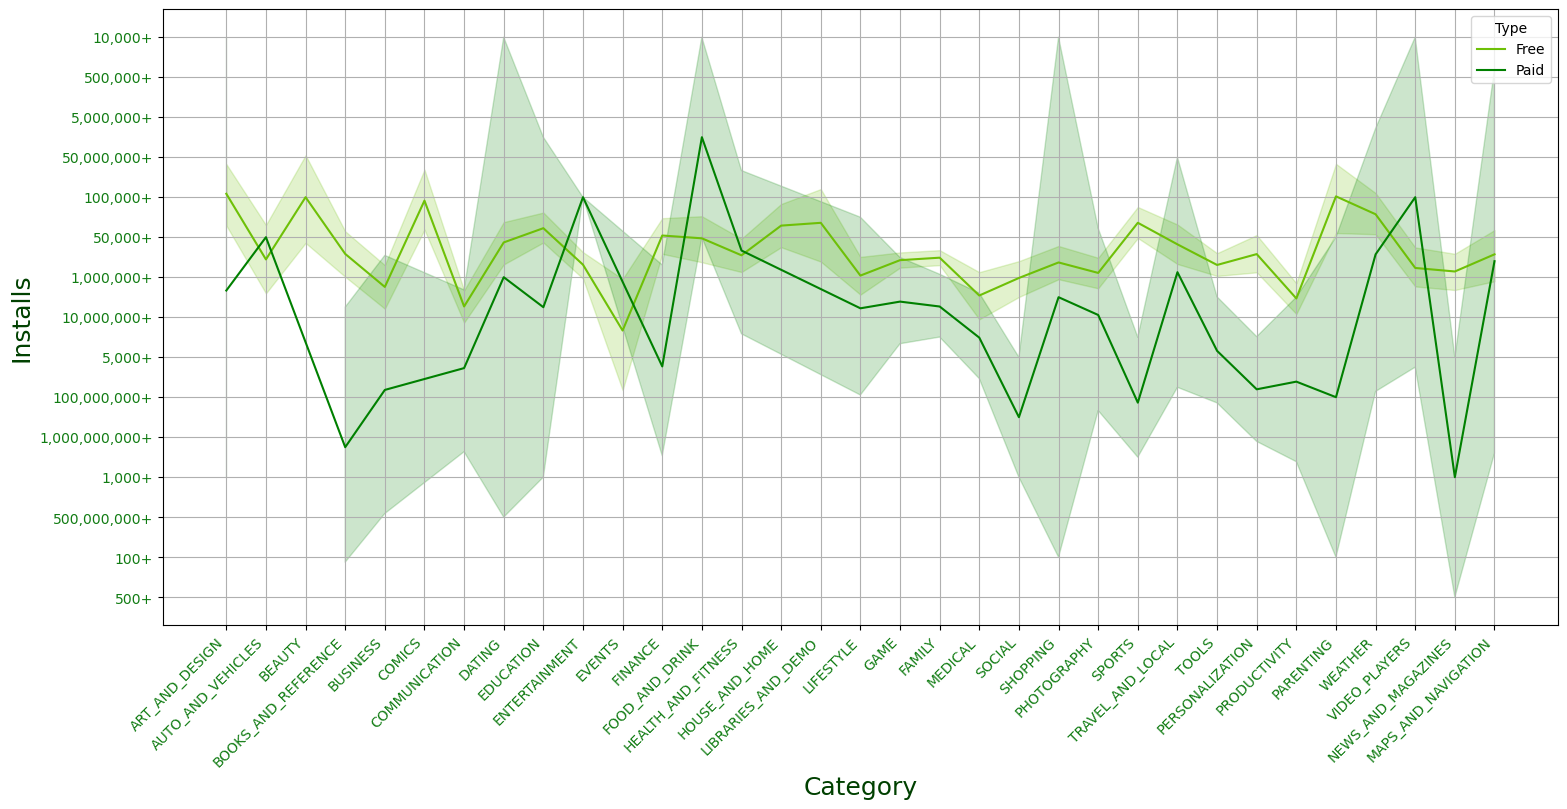

In [171]:
plt.figure(figsize=(18, 8))
text_color = "#117c13"
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Category', color=color_t, fontsize=18)
plt.ylabel('Installs' , color=color_t, fontsize=18)
plt.grid()
line_palette = {'Free': '#6ec007', 'Paid': 'green'}
sns.lineplot(x='Category', y='Installs', data=dg, hue='Type', palette=line_palette)


### Bar plot of Apps vs Category

Text(0.5, 1.0, 'Count of app in each category')

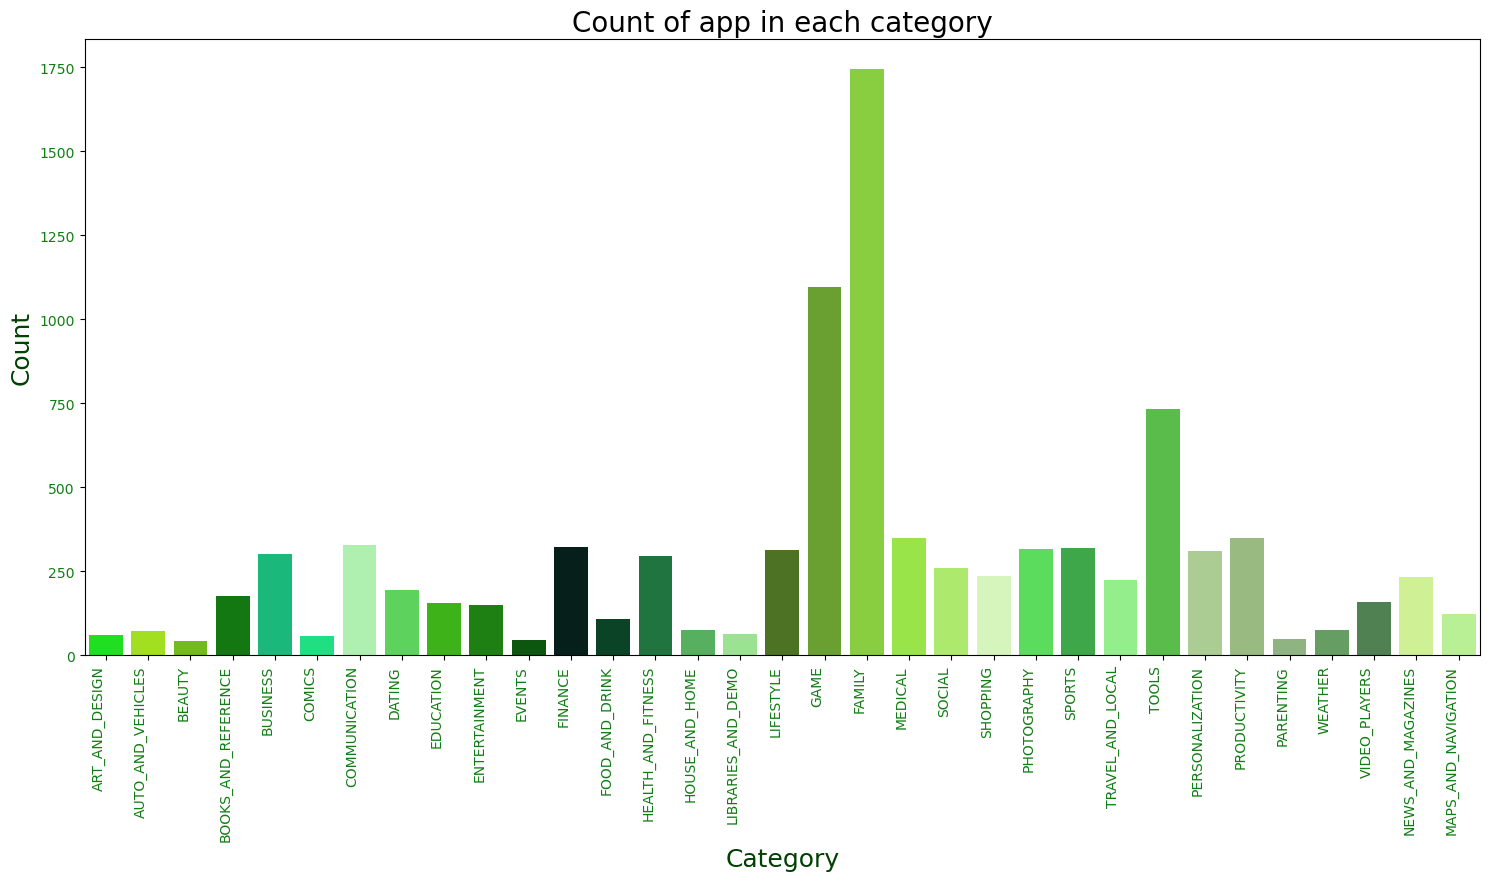

In [172]:
plt.figure(figsize=(18, 8))
color_t = "#004000"
plot_color = "#009900"
custom_palette = ["#00ff00", "#adff00", "#74d600", "#028900", "#00d27f","#00ff83", "#a4fba6", "#4ae54a", "#30cb00", "#0f9200",
                 "#006203", "#02231c", "#004d25", "#11823b", "#48bf53","#91f086", "#4d7f17", "#6bb120", "#8ae429", "#9afe2e",
                 "#aefe57", "#d4ffb2", "#45f248", "#2db83d", "#85ff7a","#4cd038", "#aad688", "#98c377", "#8bbd78", "#5ea758",
                 "#47894b", "#d5ff87", "#b6ff87", "#82ff59"]
g = sns.countplot(x="Category",data=dg, palette=custom_palette)
g.set_xlabel("Category", color=color_t, fontsize=18)
g.set_ylabel("Count" , color=color_t, fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.title('Count of app in each category',size = 20)

### Grid od Ratings vs Installs

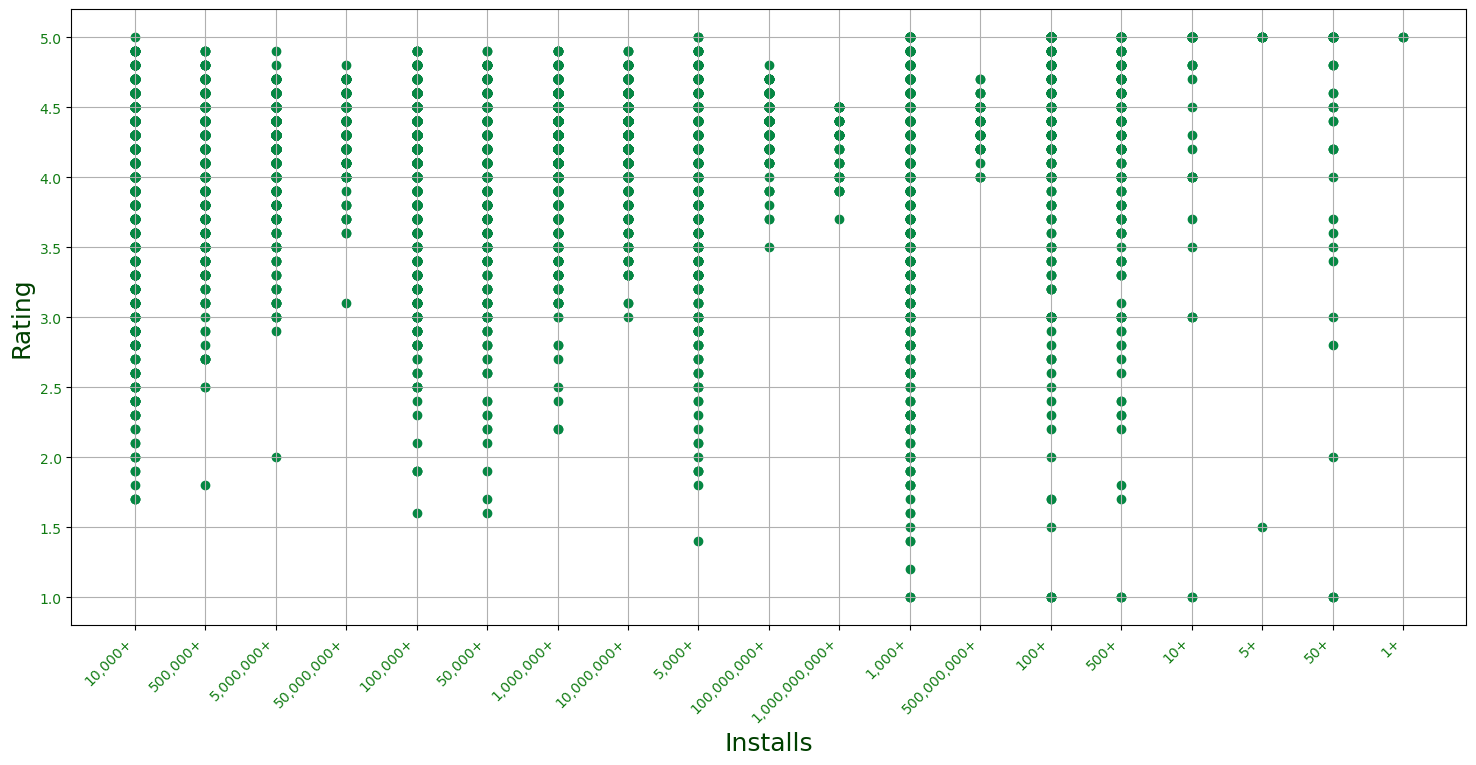

In [173]:
plt.figure(figsize=(18, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
plt.scatter(dg['Installs'] , dg['Rating'] , color = '#058743')
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Installs', color=color_t, fontsize=18)
plt.ylabel('Rating' , color=color_t, fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

## Distribution of Free vs Paid apps

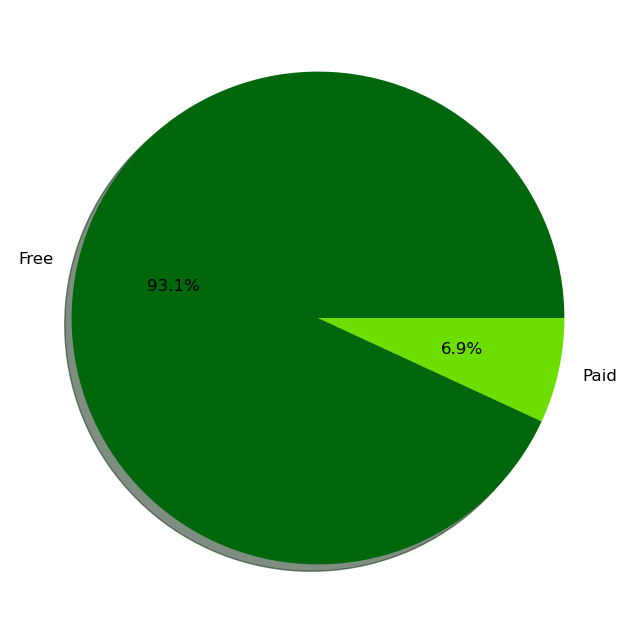

In [174]:
plt.figure(figsize=(18, 8))
text_color = "#117c13"
value_counts = dg['Type'].value_counts()
text_props = {'fontsize': 12, 'color': 'black'}
colors = ["#00670c","#6ddf00", "#a3ff00"]
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%' , textprops=text_props,shadow=True, colors=colors)
plt.show()

## Grid plot of Price Vs Rating of Apps

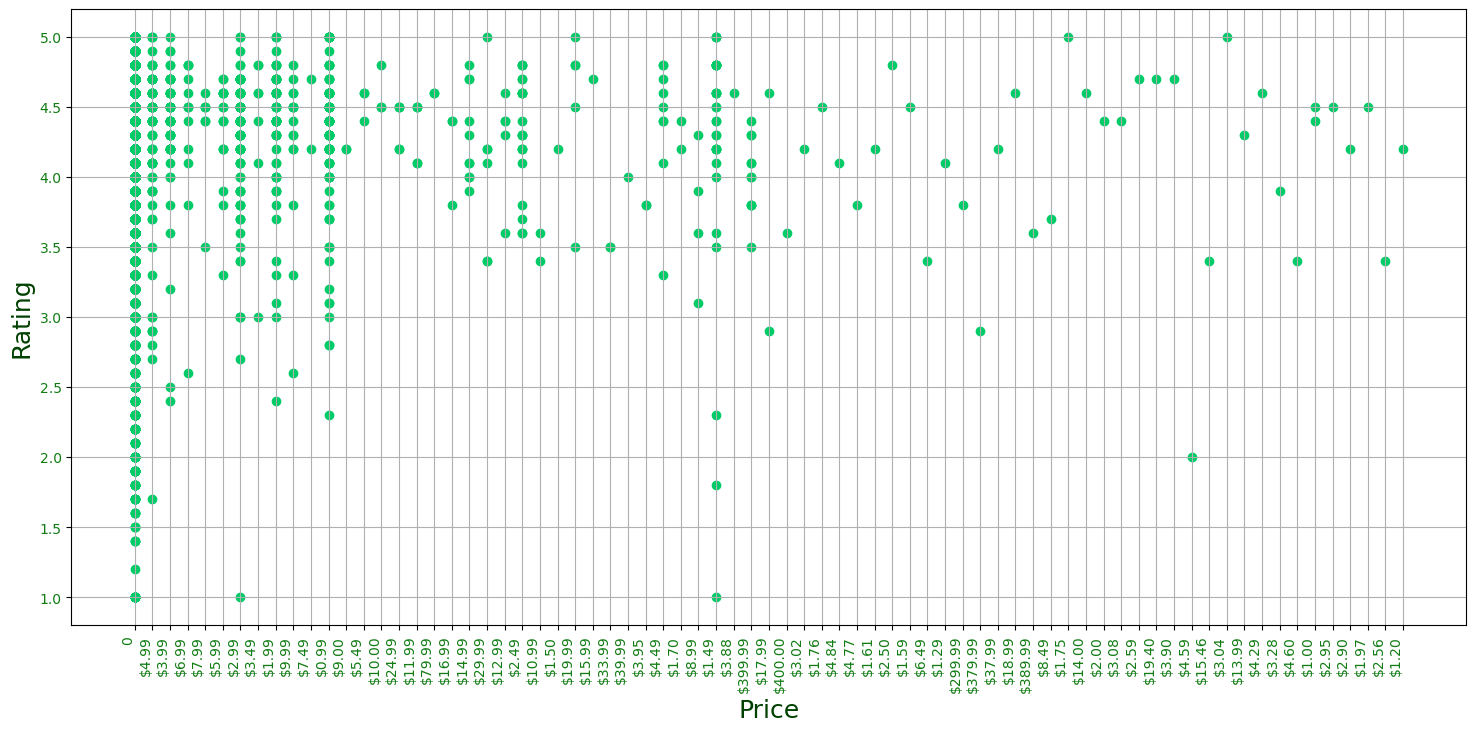

In [175]:
plt.figure(figsize=(18, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
plt.scatter(dg['Price'] , dg['Rating'] , color = '#00cc67')
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Price', color=color_t, fontsize=18)
plt.ylabel('Rating' , color=color_t, fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.show()

### Count of Apps in each Category

Text(0.5, 1.0, 'Count of app in each category')

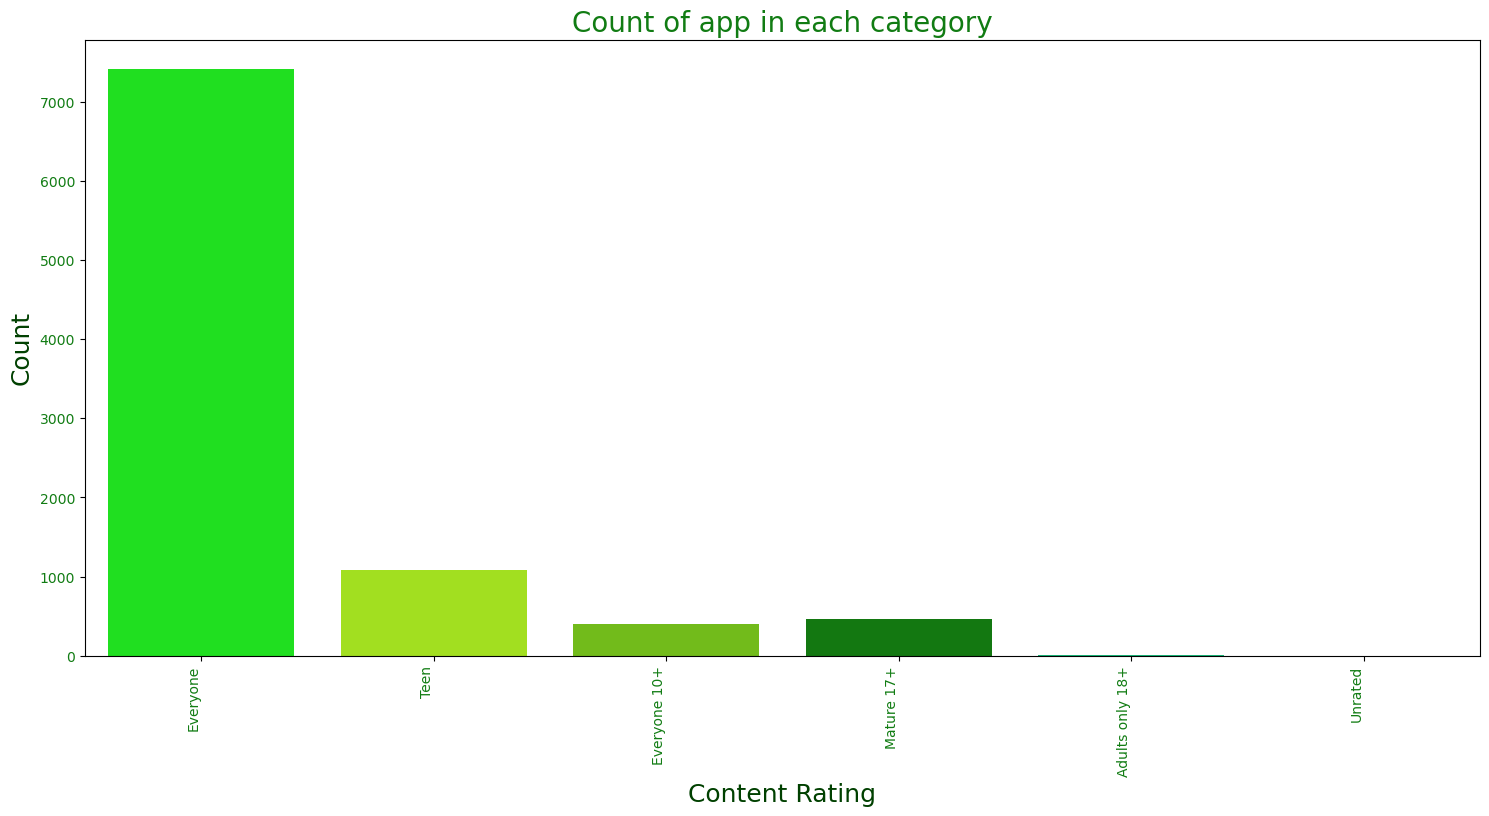

In [176]:
plt.figure(figsize=(18, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
custom_palette = ["#00ff00", "#adff00", "#74d600", "#028900", "#00d27f","#00ff83"]
g = sns.countplot(x="Content Rating",data=dg, palette = custom_palette)
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Content Rating', color=color_t, fontsize=18)
plt.ylabel('Count' , color=color_t, fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of app in each category',size = 20 , color=text_color)

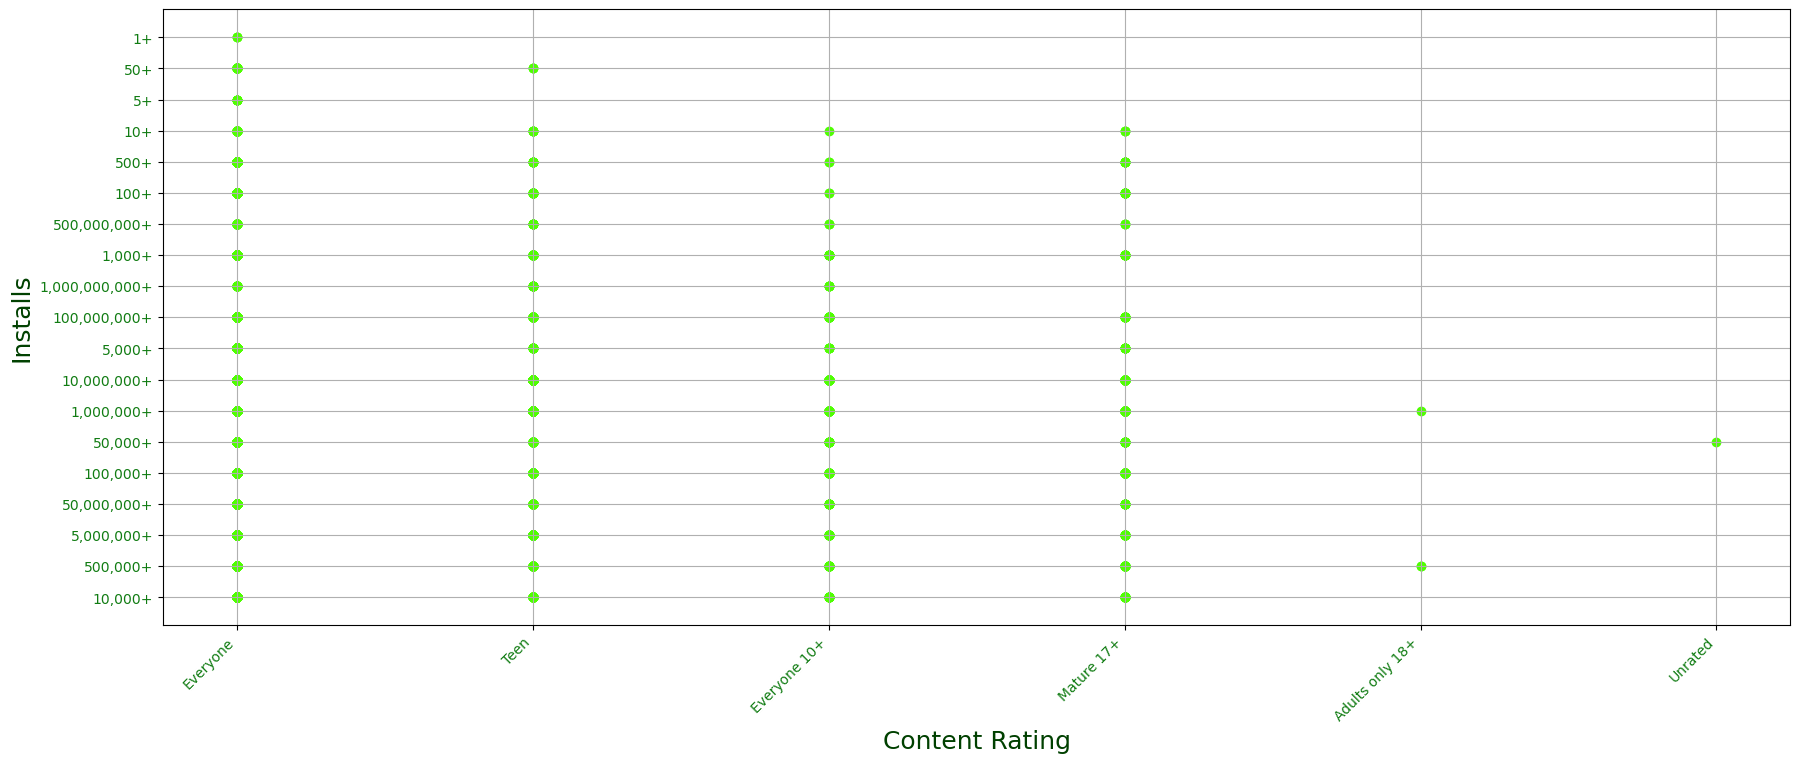

In [65]:
plt.figure(figsize=(21, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
plt.scatter(dg['Content Rating'] , dg['Installs'] , color = color)
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Content Rating', color=color_t, fontsize=18)
plt.ylabel('Installs' , color=color_t, fontsize=18)
plt.grid()
plt.show()

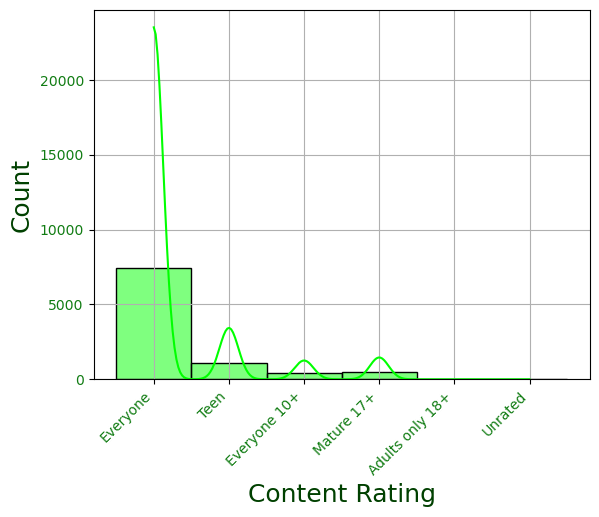

In [177]:
color = "#00ff00"
color_t = "#004000"
text_color = "#117c13"
sns.histplot(data=dg, x='Content Rating', kde=True , color=color)
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Content Rating', color=color_t, fontsize=18)
plt.ylabel('Count' , color=color_t, fontsize=18)
plt.grid()
plt.show()

## Distribution of columns

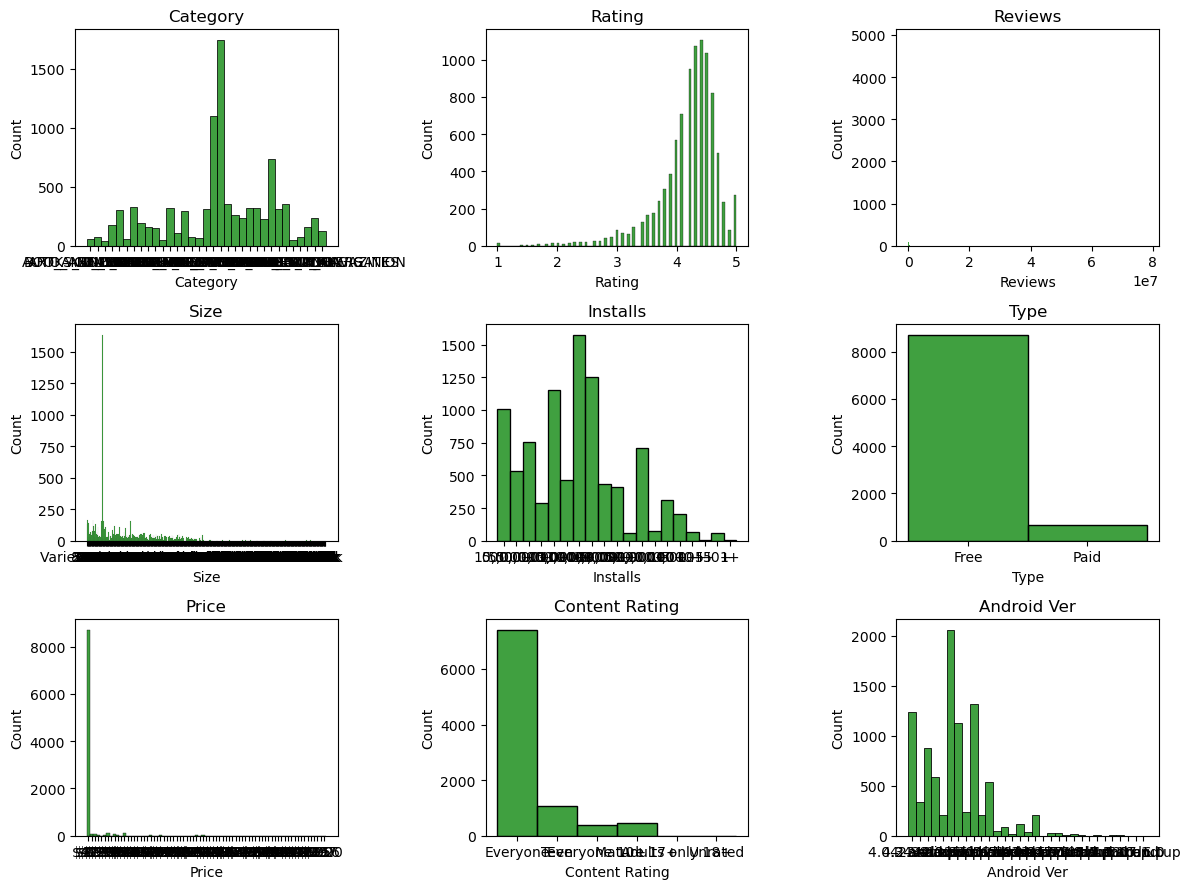

In [178]:
visual_data = dg.drop(['App' ,'Current Ver'  , 'Last Updated' , 'Genres'] , axis = 1)
num_cols = len(visual_data.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()

for i, column in enumerate(visual_data.columns):
    ax = axes[i]
    sns.histplot(visual_data[column], ax=ax, color = "green")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Pre-processing

In [179]:
# Replace 'M' with '000', remove 'k', replace 'Varies with device' with NaN
dg['Size'] = dg['Size'].str.replace('M', '000').str.replace('k', '').replace('Varies with device', np.nan)

# Remove non-numeric characters (except '.')
dg['Size'] = dg['Size'].replace('[^\d.]', '', regex=True)

# Convert to numeric, errors='coerce' will replace non-convertible values with NaN
dg['Size'] = pd.to_numeric(dg['Size'], errors='coerce')

# Replace NaN with 0
dg['Size'] = dg['Size'].fillna(0)

In [180]:
for i in dg['Size']:
    if i < 10:
        dg['Size']=dg['Size'].replace(i,i*1000)
dg['Size']=dg['Size']/1000

In [181]:
dg['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [182]:
dg['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [183]:
additinal_item = ['+' , ',' , '$']
target_cols = ['Installs' , 'Price']
for item in additinal_item:
    for col in target_cols:
        dg[col] = dg[col].str.replace(item,'')
dg.head()

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_11908\3095365019.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dg[col] = dg[col].str.replace(item,'')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [184]:
import pandas as pd

# Assuming 'your_column' is the column you want to convert
dg['Installs'] = pd.to_numeric(dg['Installs'], errors='coerce')


In [185]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1023.8+ KB


In [186]:
dg['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [187]:
#### Change Last update into a datetime column
dg['Last Updated'] = pd.to_datetime(dg['Last Updated'])
dg['Last Updated'].head(10)

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
5   2017-03-26
6   2018-04-26
7   2018-06-14
8   2017-09-20
9   2018-07-03
Name: Last Updated, dtype: datetime64[ns]

In [188]:
dg['Updated_Month']=dg['Last Updated'].dt.month
dg['Updated_Year']=dg['Last Updated'].dt.year

In [189]:
dg.drop('Last Updated', axis=1, inplace=True)
dg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [190]:
dg['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [191]:
dg['Type'] = LabelEncoder().fit_transform(dg['Type'])

In [192]:
dg['Type'].unique()

array([0, 1])

In [193]:
dg['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [194]:
additinal_item_android = ['and up' , 'W' , '- 7.1.1','- 8.0','.' , '- 60','0',' ' ]
target_col_android = ['Android Ver' ]
for item in additinal_item_android:
    for col in target_col_android:
        dg[col] = dg[col].str.replace(item,'')

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_11908\3434255989.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dg[col] = dg[col].str.replace(item,'')
C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_11908\3434255989.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dg[col] = dg[col].str.replace(item,'')


In [195]:
dg['Android Ver'].unique()

array(['43', '42', '44', '23', '3', '41', '4', '233', 'Varieswithdevice',
       '22', '5', '6', '16', '15', '21', '7', '2', '32', '51', '71', '8',
       '31', '1'], dtype=object)

In [196]:
#nominal features
nominal_features = ["App", "Category", "Genres", "Current Ver", "Android Ver"]

#ordinal features
ordinal_features =[ 
    "Reviews","Size","Installs","Type","Price","Content Rating","Updated_Month", "Updated_Year"]

In [151]:
Ordinal_label = ["Reviews","Size","Installs","Type","Price","Content Rating","Updated_Month", "Updated_Year"]
le = LabelEncoder()

for label in Ordinal_label:
    dg[label] = le.fit_transform(dg[label])

In [197]:
dg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0,Everyone,Art & Design,1.0.0,43,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0,Everyone,Art & Design;Pretend Play,2.0.0,43,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0,Everyone,Art & Design,1.2.4,43,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0,Teen,Art & Design,Varies with device,42,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0,Everyone,Art & Design;Creativity,1.1,44,6,2018


## Mergings of data

In [198]:
merged_df = pd.merge(dr, dg, on='App', how='inner')
merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017


In [ ]:
dataset['Android Ver'].unique()

## Missing Values

In [199]:
Merged_df = merged_df.dropna()  # Remove rows with any NaN values
Merged_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
6,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017


## Duplicates removal

In [200]:
# Remove duplicates
Merged_df = Merged_df.drop_duplicates()

## Info of data

In [201]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40376 entries, 0 to 122380
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40376 non-null  object 
 1   Translated_Review       40376 non-null  object 
 2   Sentiment               40376 non-null  object 
 3   Sentiment_Polarity      40376 non-null  float64
 4   Sentiment_Subjectivity  40376 non-null  float64
 5   Category                40376 non-null  object 
 6   Rating                  40376 non-null  float64
 7   Reviews                 40376 non-null  int64  
 8   Size                    40376 non-null  float64
 9   Installs                40376 non-null  int64  
 10  Type                    40376 non-null  int32  
 11  Price                   40376 non-null  object 
 12  Content Rating          40376 non-null  object 
 13  Genres                  40376 non-null  object 
 14  Current Ver             40376 non-nul

In [202]:
Merged_df.shape

(40376, 18)

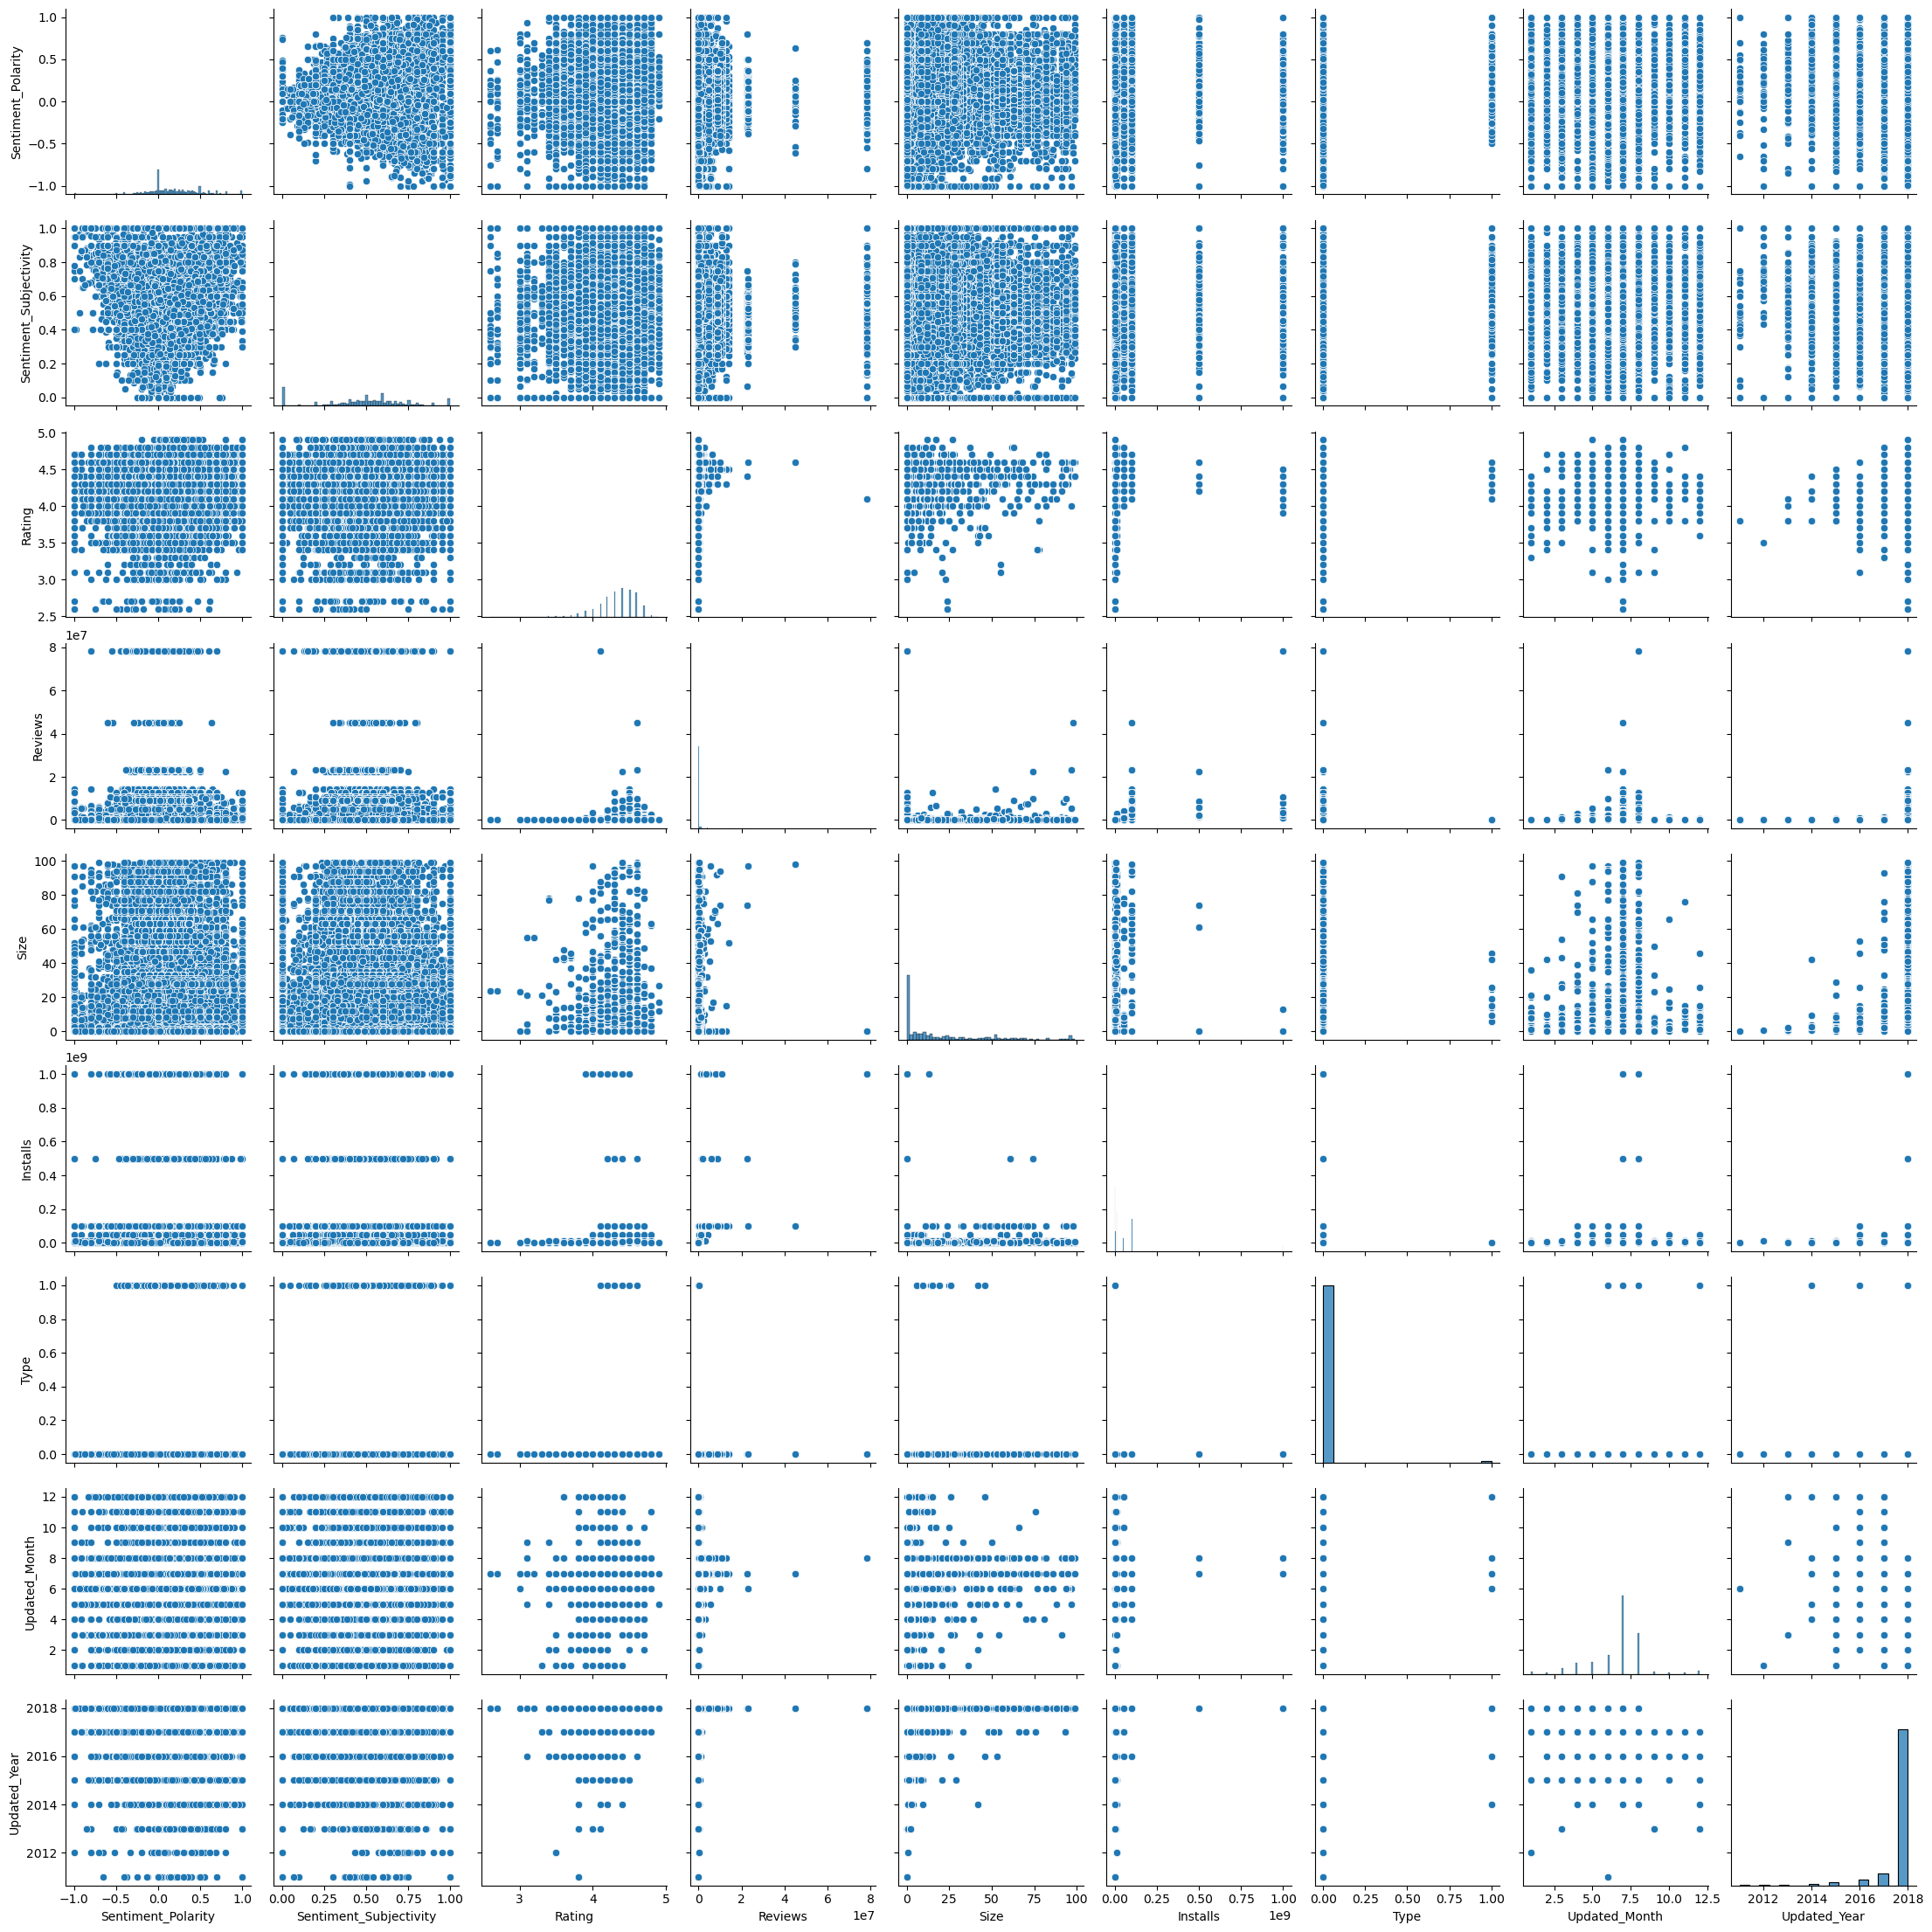

In [203]:
# Explore data using visualizations and descriptive statistics
sns.pairplot(Merged_df)
plt.show()


C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_11908\361376752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Merged_df.corr(), annot=True, cmap='coolwarm')


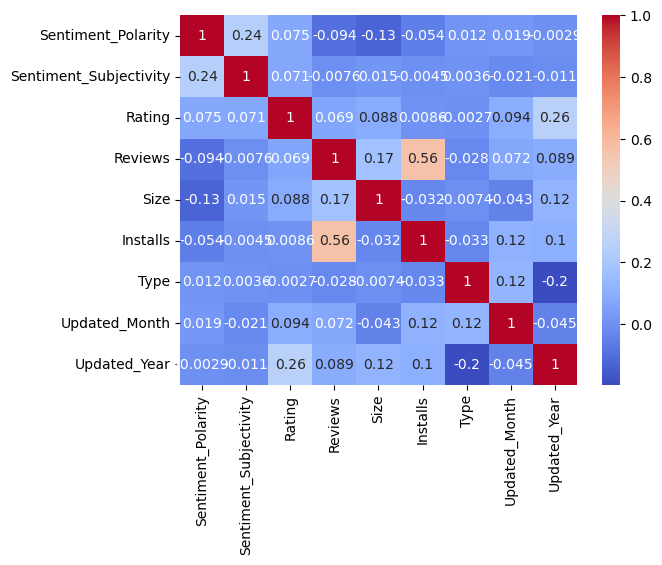

In [204]:
# Explore relationships between variables
sns.heatmap(Merged_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [205]:
# Drop highly correlated features
correlation_matrix = Merged_df.corr()
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

dF = merged_df.drop(columns=highly_correlated_features)


C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_11908\4159921727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Merged_df.corr()


## Drop Missing Values

In [206]:
df = dF.dropna()  # Remove rows with any NaN values
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017
6,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,0,0,Everyone 10+,Health & Fitness,1.9,233,2,2017


## Preprocessing of the Data

In [207]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_features = ['Reviews', 'Size']  # Include other numerical features as needed
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_11908\3175692816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [208]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Category', 'Type', 'Content Rating', 'Genres'], drop_first=True)


In [209]:
!pip install category_encoders
import category_encoders as ce

# Assuming 'dataset' is your DataFrame
encoder = ce.HashingEncoder(n_components=2, return_df=True)
df = encoder.fit_transform(dg)
df.head(5)

,col_0,col_1,Rating,Reviews,Size,Installs,Type,Updated_Month,Updated_Year
0,6,1,4.1,159,19.0,10000,0,1,2018
1,5,2,3.9,967,14.0,500000,0,1,2018
2,5,2,4.7,87510,8.7,5000000,0,8,2018
3,5,2,4.5,215644,25.0,50000000,0,6,2018
4,7,0,4.3,967,2.8,100000,0,6,2018


## Linear Regression Model

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.2534458691171584
R-squared: 0.019061107474426575


## Result

### Mean Squared Error (MSE):

MSE measures the average squared difference between the predicted values and the actual values.
A lower MSE indicates better model performance.
In your case, an MSE of 0.2534 suggests that, on average, the squared difference between predicted and actual values is 0.2534.
R-squared (R²):

### R-squared is a measure of how well the model explains the variance in the target variable.
It ranges from 0 to 1, with 1 indicating a perfect fit.
A higher R-squared value suggests a better fit of the model to the data.
An R-squared of 0.0191 indicates that the model explains only a small portion (1.91%) of the variance in the target variable.
This model has a relatively high Mean Squared Error, indicating that the predicted values deviate from the actual values by a considerable amount on average. Additionally, the R-squared value is low, suggesting that the model does not explain a significant proportion of the variance in the target variable. This could indicate that the model might not be capturing the underlying patterns in the data very well, and there might be room for improvement. Consider exploring additional features, trying different algorithms, or tuning the model parameters to enhance its performance.